## Assignment 04 


In [ ]:
#01 


In [5]:
# ============================================
# ASSIGNMENT 4 : SVM with and without PCA
# ============================================

#  Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef, roc_curve, auc
)
import matplotlib.pyplot as plt

# ============================================
#  Step 2: Load Dataset
# ============================================
data = pd.read_csv('diabetes.csv')
X = data.drop(columns=['Outcome'])
y = data['Outcome']
dataset_name = "Pima Indians Diabetes Dataset"
y_pos = y

# ============================================
#  Step 3: Preprocessing
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_pos, test_size=0.3, stratify=y_pos, random_state=42
)

# ============================================
#  Step 4: Define Evaluation Function
# ============================================
def evaluate_svm(clf, Xtr, Xte, ytr, yte):
    clf.fit(Xtr, ytr)
    ypred = clf.predict(Xte)
    acc = accuracy_score(yte, ypred)
    prec = precision_score(yte, ypred)
    sens = recall_score(yte, ypred)  # Sensitivity = Recall of positive class
    tn, fp, fn, tp = confusion_matrix(yte, ypred).ravel()
    spec = tn / (tn + fp)  # Specificity
    f1 = f1_score(yte, ypred)
    mcc = matthews_corrcoef(yte, ypred)
    return {
        "accuracy": acc,
        "sensitivity": sens,
        "specificity": spec,
        "precision": prec,
        "f1-score": f1,
        "mcc": mcc,
        "confusion_matrix": np.array([[tn, fp], [fn, tp]]),
        "y_score": clf.predict_proba(Xte)[:, 1]
    }

# ============================================
#  Step 5: Train SVMs (Without PCA)
# ============================================
models_no_pca = {
    "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    "SVM (Polynomial, degree=2)": SVC(kernel="poly", degree=2, probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42)
}

results_no_pca = {}
for name, model in models_no_pca.items():
    results_no_pca[name] = evaluate_svm(model, X_train, X_test, y_train, y_test)

# ============================================
#  Step 6: Apply PCA (95% Variance Retained)
# ============================================
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pos, test_size=0.3, stratify=y_pos, random_state=42
)

# ============================================
#  Step 7: Train SVMs (With PCA)
# ============================================
models_pca = {
    "PCA + SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    "PCA + SVM (Polynomial, degree=2)": SVC(kernel="poly", degree=2, probability=True, random_state=42),
    "PCA + SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42)
}

results_pca = {}
for name, model in models_pca.items():
    results_pca[name] = evaluate_svm(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

# ============================================
#  Step 8: Display Results in Tables
# ============================================
def build_table(results_dict, dataset_name):
    rows = []
    for method, metrics in results_dict.items():
        rows.append({
            "Method": method,
            "Dataset": dataset_name,
            "Accuracy": round(metrics["accuracy"], 4),
            "Sensitivity": round(metrics["sensitivity"], 4),
            "Specificity": round(metrics["specificity"], 4),
            "Precision": round(metrics["precision"], 4),
            "F1-score": round(metrics["f1-score"], 4),
            "MCC": round(metrics["mcc"], 4)
        })
    return pd.DataFrame(rows)

table1 = build_table(results_no_pca, dataset_name)
table2 = build_table(results_pca, dataset_name)

print("\n=== Table-1: Without Feature Dimensionality Reduction ===\n")
print(table1)
print("\n=== Table-2: With PCA Feature Dimensionality Reduction ===\n")
print(table2)


=== Table-1: Without Feature Dimensionality Reduction ===

                       Method                        Dataset  ...  F1-score     MCC
0                SVM (Linear)  Pima Indians Diabetes Dataset  ...    0.5594  0.3738
1  SVM (Polynomial, degree=2)  Pima Indians Diabetes Dataset  ...    0.3932  0.2595
2                   SVM (RBF)  Pima Indians Diabetes Dataset  ...    0.6027  0.4279

[3 rows x 8 columns]

=== Table-2: With PCA Feature Dimensionality Reduction ===

                             Method  ...     MCC
0                PCA + SVM (Linear)  ...  0.3738
1  PCA + SVM (Polynomial, degree=2)  ...  0.2595
2                   PCA + SVM (RBF)  ...  0.4279

[3 rows x 8 columns]



Best Classifier: SVM (RBF)
Confusion Matrix:
 [[129  21]
 [ 37  44]]


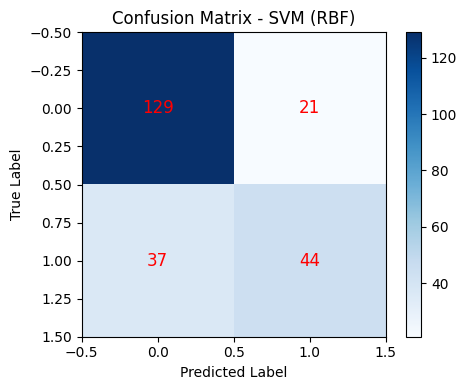

In [3]:

# ============================================
# 🔹 Step 9: Confusion Matrix of Best Classifier
# ============================================
# Combine results and find best by accuracy
all_results = {**results_no_pca, **results_pca}
best_model_name = max(all_results, key=lambda x: all_results[x]["accuracy"])
best_metrics = all_results[best_model_name]
cm = best_metrics["confusion_matrix"]

print(f"\nBest Classifier: {best_model_name}")
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=12)
plt.tight_layout()
plt.show()




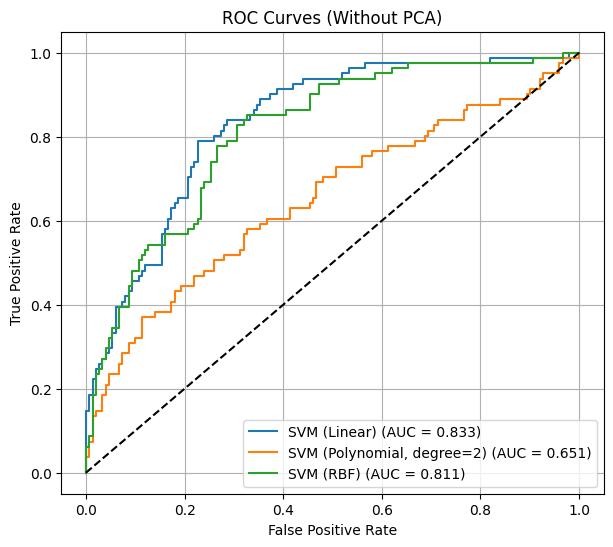

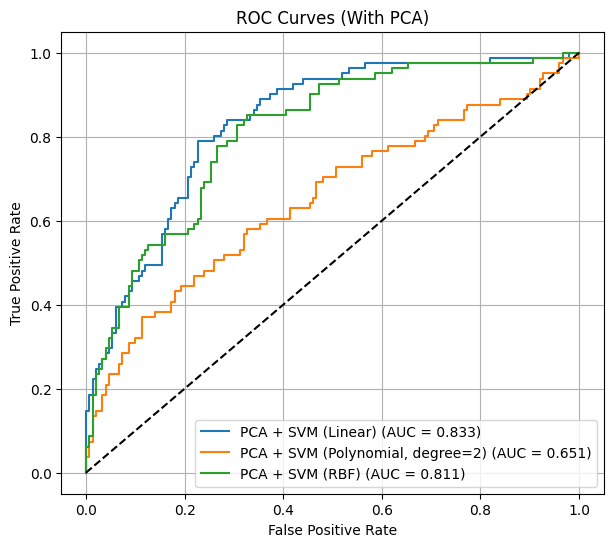

In [4]:
# ============================================
# 🔹 Step 10: ROC Curve Comparison
# ============================================
plt.figure(figsize=(7,6))
for name, res in results_no_pca.items():
    fpr, tpr, _ = roc_curve(y_test, res["y_score"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curves (Without PCA)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ROC Curves for PCA-based models
plt.figure(figsize=(7,6))
for name, res in results_pca.items():
    fpr, tpr, _ = roc_curve(y_test_pca, res["y_score"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curves (With PCA)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()